 # ClusterAI - 2020
## TP integrador - Primera parte
### EDA inicial - Obras Públicas (Dataset Provincia Bs. As)
### Grupo_08 - 2020

Para el desarrollo del presente código se utilizó el dataset del portal de Buenos Aires Data: https://data.buenosaires.gob.ar/dataset/ba-obras

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_csv('observatorio-de-obras-urbanas.csv')

In [3]:
# Como siempre vemos las dimensiones e imprimimos las primeras líneas
print(f'Tamaño del dataset: {np.shape(obras)}')
obras.head()

Tamaño del dataset: (1117, 36)


,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,beneficiarios,mano_obra,compromiso,destacada,ba_elige,link_interno,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento
0,1,Plan 54 escuelas,Escuela de Educación Primaria N.° 24 D.E. 15 «...,Finalizada,Escuelas,Ministerio de Educación,Primaria,67065700.0,12.0,Villa Urquiza,...,NaN,NaN,NaN,SI,NaN,https://www.buenosaires.gob.ar/baobras/54-escu...,https://buenosaires.gob.ar/areas/planeamiento_...,914412-MDUGC-2013,NaN,NaN
1,2,Donado Holmberg,Calle Holmberg: Nivelación en cruce,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,En el marco del proyecto urbano del Barrio Par...,9950017.0,12.0,Villa Urquiza,...,NaN,16.0,NaN,NaN,NaN,https://www.buenosaires.gob.ar/baobras/Donado-...,https://www.buenosaires.gov.ar/areas/planeamie...,5515928/2014,NaN,NaN
2,3,Área Ambiental Central,Área Ambiental Central: Calles Alsina Y Moreno,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,Se intervinieron los tramos comprendidos entre...,36942632.0,1.0,Montserrat,...,NaN,55.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
3,4,Área Ambiental Central,Área Ambiental Central: Calle Esmeralda I,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,La obra incluyó el tramo ubicado entre la Av. ...,26938294.0,1.0,San Nicolás,...,NaN,59.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
4,5,Villa Olímpica,Villa Olímpica: Demoliciones en el Parque de l...,Finalizada,Vivienda,Secretaría de Transporte y Obras Públicas,Se realizó las demoliciones de las construccio...,6990315.0,8.0,Villa Soldati,...,NaN,NaN,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/villa-o...,https://www.buenosaires.gov.ar/areas/planeamie...,13793268/DGPUYA/2014,NaN,NaN


## Objetivo del Proyecto:
### Alt. 1: Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## EDA Inicial

In [4]:
# Procedemos a visualizar correctamente todas las columnas del dataset y guardamos en una variable llamada columnas
columnas = obras.columns
columnas

Index(['id', 'entorno', 'nombre', 'etapa', 'tipo', 'area_responsable',
       'descripcion', 'monto_contrato', 'comuna', 'barrio', 'direccion', 'lat',
       'lng', 'fecha_inicio', 'fecha_fin_inicial', 'plazo_meses',
       'porcentaje_avance', 'imagen_1', 'imagen_2', 'imagen_3', 'imagen_4',
       'licitacion_oferta_empresa', 'licitacion_anio', 'contratacion_tipo',
       'nro_contratacion', 'cuit_contratista', 'beneficiarios', 'mano_obra',
       'compromiso', 'destacada', 'ba_elige', 'link_interno',
       'pliego_descarga', 'expediente-numero', 'estudio_ambiental_descarga',
       'financiamiento'],
      dtype='object')

In [5]:
# Queremos conocer si alguna de las columnas posee valores nulos.
# En caso de ser variables de interés, procederemos a explorarlas
obras.isnull().sum().sort_values(ascending=False)

financiamiento                1111
ba_elige                      1111
destacada                     1084
estudio_ambiental_descarga    1069
beneficiarios                  922
nro_contratacion               874
expediente-numero              872
mano_obra                      864
imagen_4                       825
compromiso                     800
contratacion_tipo              778
imagen_3                       664
imagen_2                       451
licitacion_anio                358
pliego_descarga                346
cuit_contratista               328
plazo_meses                    100
direccion                       99
licitacion_oferta_empresa       72
monto_contrato                  70
fecha_inicio                    51
imagen_1                        49
descripcion                     38
fecha_fin_inicial               30
link_interno                    27
lng                              9
lat                              9
comuna                           7
barrio              

In [6]:
# Vemos cantidad y % de NaN por columna.
# El dato de % nos va a servir a la hora de tomar la decisión de borrar o no filas con NaNs.
total = obras.isnull().sum().sort_values(ascending=False)
percent = (obras.isnull().sum()/obras.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
financiamiento,1111,0.994628
ba_elige,1111,0.994628
destacada,1084,0.970457
estudio_ambiental_descarga,1069,0.957028
beneficiarios,922,0.825425
nro_contratacion,874,0.782453
expediente-numero,872,0.780662
mano_obra,864,0.773500
imagen_4,825,0.738585
compromiso,800,0.716204


In [7]:
# Observamos las descripciones de las obras realizadas:

descrip = pd.DataFrame(obras['descripcion'].unique())
print(descrip)

                                                     0
0                                             Primaria
1    En el marco del proyecto urbano del Barrio Par...
2    Se intervinieron los tramos comprendidos entre...
3    La obra incluyó el tramo ubicado entre la Av. ...
4    Se realizó las demoliciones de las construccio...
..                                                 ...
848  Remodelación meson de informes y acceso consul...
849  Implica trabjos de mejoramiento de ascensores ...
850               Construcción de Depósitos y Talleres
851  Sistema de Aire acondicionado del sector consu...
852  Instalación de un Tomógrafo y obra civil neces...

[853 rows x 1 columns]


Observación: Esta feature no será utilizada precisamente para el modelo de predicción pero es importante tener al menos una idea general del tipo y magnitud de obra que se estará analizando más adelante.

De esta forma, observamos que hay algunas descripciones de obras "menores" o sencillas, como por ejemplo:
 'La remodelación consistió en generar un sector para la sala de lectura de niños, sanitarios para los mismos y un local destinado a la lactancia.'
 
 
Y de obras de una magnitud mucho mayor, como por ejemplo:
 'La obra consiste en la construcción de tres nuevos edificios que se emplazarán en el Parque Olímpico, con la intención de mudar al CENARD a la zona sur. Habrá oficinas, una residencia y un Centro de Ciencias Aplicadas al Deporte, una escuela, oficina antidoping, una cancha murciélago y se readecuarán 4 pabellones.'
 
Lo cual nos da un indicio de que la gran variedad de obras se traducirá en un tipo de dataset desbalanceado.

## Variables de interés a analizar:
- Etapa
- Tipo
- Monto del contrato
- Barrio / Comuna
- Plazo en meses

### Etapa

In [8]:
# En primer lugar, analizaremos la feature "etapa"
# Comenzaremos analizando cómo vienen dados los valores, para ver si es necesario procesarlos

etapas= len(obras['etapa'].unique()) 
print(f'En total hay {etapas} etapas de obras."\r\n')
print("\n", obras['etapa'].unique())

En total hay 5 etapas de obras."


 ['Finalizada' 'En ejecución' 'En proyecto' 'En licitación' 'En Ejecución']


In [9]:
# Agruparemos en ejecución y en proyecto, ya que para el caso, pueden ser consideradas similares:

def clean_row(row):
    a= ['En ejecución','En proyecto','En Ejecución']
    
    if row.etapa in a:
        return 'En ejecución'
    return row.etapa

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['etapa']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.etapa.unique())

# Con esto ya queda ok, porque como vimos antes, no hay ninguna sample sin etapa

['Finalizada' 'En ejecución' 'En licitación']


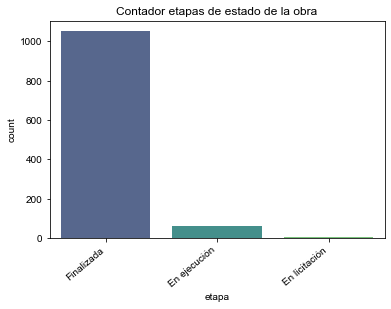

In [10]:
# Visualizamos rápidamente con un countplot

ax = sns.countplot(x='etapa', 
                   data=obras_cleaned, 
                   palette='viridis',
                   alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Contador etapas de estado de la obra')
sns.set_style('darkgrid')
plt.show()

# Vemos que el grueso de los samples ya están finalizados

In [11]:
estado_etapas = (obras_cleaned[['etapa','tipo']].groupby(['etapa']).count()).sort_values(by='tipo',ascending=False)
total = estado_etapas.sum()
porcentaje = (estado_etapas / total)*100
estado_etapas['Porcentaje'] = porcentaje
estado_etapas

,tipo,Porcentaje
etapa,,
Finalizada,1052,94.180842
En ejecución,61,5.461056
En licitación,4,0.358102


Observación: El objetivo que buscamos es predecir el tiempo de realización de la obra, es conveniente quedarnos con las obras finalizadas ya que sabemos con certeza los meses que le llevó a la misma ser realizada. Con la tabla anterior podemos observar que representa el 94% de las obras registradas. 
Las samples "En ejecución" y "En licitación" conforman el 6% restante que para el caso no son de interés.

Continuamos con el EDA teniendo en cuenta este punto para ir verificando durante el análisis de cada feature cómo se modifica este valor.

### Tipo

In [12]:
# Analizamos la cantidad de valores únicos en el feature de tipo de obra

tipos_obras = len(obras['tipo'].unique()) 
print(f'En total hay {tipos_obras} tipos de obras."\r\n')
print("\n", obras['tipo'].unique())

En total hay 7 tipos de obras."


 ['Escuelas' 'Espacio Público' 'Vivienda' 'Hidráulica e Infraestructura'
 'Arquitectura' 'Transporte' 'Salud']


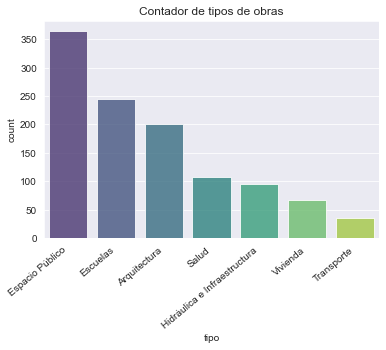

In [13]:
# En este caso no es necesario re agrupar los valores únicos
# Y tampoco se requiere de análisis de NaNs ya que como vimos previamente, no posee valores nulos.
# Comenzamos a analizar la feature mediante gráficos:

ax = sns.countplot(x='tipo', 
                   data=obras,
                   palette='viridis', 
                   alpha=0.8,
                   order=obras['tipo'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de tipos de obras")
plt.show()

In [14]:
# Visualizamos los porcentajes que representa cada tipo de obra

tipo_obra = (obras_cleaned[['etapa','tipo']].groupby(['tipo']).count()).sort_values(by='etapa',ascending=False)
total_tipo = tipo_obra.sum()
porcentaje_tipo = (tipo_obra / total_tipo)*100
tipo_obra['Porcentaje'] = porcentaje_tipo
tipo_obra

,etapa,Porcentaje
tipo,,
Espacio Público,364,32.587287
Escuelas,245,21.933751
Arquitectura,201,17.994628
Salud,108,9.668756
Hidráulica e Infraestructura,95,8.504924
Vivienda,68,6.087735
Transporte,36,3.222919


([<matplotlib.patches.Wedge at 0x1b6b2d7d670>,
 [Text(-0.8540697505929657, 0.5201584961548443, 'Espacio Público'),
  Text(-0.3940223307316362, -0.9191008665455653, 'Escuelas'),
  Text(0.750873187378892, -0.6604464069668813, 'Arquitectura'),
  Text(0.9891183899529887, 0.14712175453279247, 'Salud'),
  Text(0.7527276596899651, 0.6583320365420994, 'Hidráulica e Infraestructura'),
  Text(0.38365755362215886, 0.923475436353702, 'Vivienda'),
  Text(0.1010779665687869, 0.9948785074944172, 'Transporte')],
 [Text(-0.597848825415076, 0.364110947308391, '32.6%'),
  Text(-0.2758156315121453, -0.6433706065818957, '21.9%'),
  Text(0.5256112311652243, -0.46231248487681686, '18.0%'),
  Text(0.6923828729670921, 0.10298522817295472, '9.7%'),
  Text(0.5269093617829755, 0.4608324255794695, '8.5%'),
  Text(0.2685602875355112, 0.6464328054475914, '6.1%'),
  Text(0.07075457659815082, 0.696414955246092, '3.2%')])

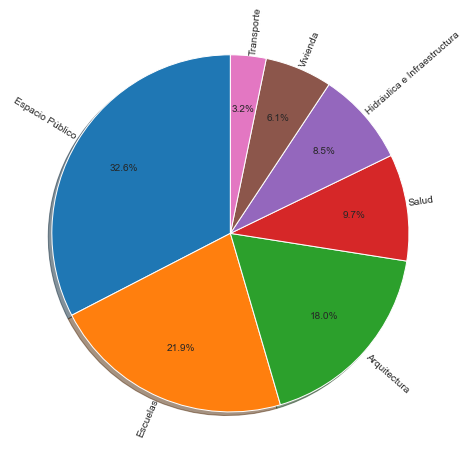

In [15]:
# Visualizamos la tabla anterior

grafico_tipo = tipo_obra.iloc[:,:]
graf = grafico_tipo.index
dat = grafico_tipo.Porcentaje
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.pie(dat, labels = graf,autopct = '%1.1f%%', 
        startangle = 90,labeldistance = 1,
        pctdistance = 0.7,rotatelabels = True,
        radius = 1,shadow = True)
 

Observación: La feature tipo de obra, como vimos al comienzo, no posee valores nulos. Lo cual resulta positivo ya que será utilizada luego para realizar nuestro modelo de machine learning. Al tener data en todas las samples no habrá problemas cuando limpiemos las otras features, sin embargo, hay que tener cuidado al momento de aplicar ML ya que si eliminamos con el EDA aquellos tipos que tienen un porcentaje bajo (como por ejemplo Transporte con un 3.2%, es probable que la predicción resulte con un bajo accuracy)

Una vez finalizado el EDA de las features en las que deban eliminarse datos, volveremos a analizar estos %.

### Monto del contrato 

In [16]:
# En esta feature hay 70 samples con valores NaNs, analizamos a qué etapa o estado de obra se ve asociado 

monto_obra = (obras_cleaned[['etapa','tipo','monto_contrato']].groupby(['etapa']).
              count()).sort_values(by='tipo',ascending=False)
monto_obra

,tipo,monto_contrato
etapa,,
Finalizada,1052,992
En ejecución,61,53
En licitación,4,2


In [17]:
monto_obra['Cantidad_Nans'] = (monto_obra.tipo-monto_obra.monto_contrato)
total_nuls = 70
monto_obra['Distribución de Nans'] = ((monto_obra.tipo-monto_obra.monto_contrato)/total_nuls)*100
monto_obra['Porcentaje de Nans'] = (monto_obra.Cantidad_Nans/monto_obra.tipo)*100
monto_obra

,tipo,monto_contrato,Cantidad_Nans,Distribución de Nans,Porcentaje de Nans
etapa,,,,,
Finalizada,1052,992,60,85.714286,5.703422
En ejecución,61,53,8,11.428571,13.114754
En licitación,4,2,2,2.857143,50.000000


Observación: Vemos que el 85% de los nulls en montos de contrato se encuentra en aquellas obras cuya etapa fue calificada como "Finalizada" que son de nuestro interés. 

Vamos a analizar si es conveniente eliminar los nulls, o reemplazarlos por un valor que nos evite eliminar datos como por ejemplo, la media por tipo de obra pública

In [18]:
# Visualizamos la descripción estadística
obras_cleaned.groupby('tipo')['monto_contrato'].describe().astype('int64')

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Arquitectura,194,47439458,169470659,146589,1247909,4061973,15350381,1389607260
Escuelas,207,19057011,57600108,47514,1119533,2991264,12057331,697650207
Espacio Público,356,19830220,59924315,56103,2569173,7619702,19941790,903283412
Hidráulica e Infraestructura,86,66164597,314760879,104574,946206,3470637,41492140,2893118429
Salud,105,22090619,39856387,241731,2828072,7489486,19060730,296735562
Transporte,33,558305555,922219981,1741124,40185440,114299267,266717844,3183200000
Vivienda,66,156850269,250527395,245946,22766531,102350323,195953091,1624752066


El desvío estándar es muy elevado (aún mayor que la media) debido a que la diferencia entre los valores mínimos y máximos que puede tomar la feature del monto de contrato es muy grande. Con lo cual, reemplazar los valores nulos por la media de cada tipo sería un valor poco representativo.

In [19]:
# Eliminamos los Nulls o Nans

obras_cleaned.dropna(subset=['monto_contrato'], how='any', inplace=True, axis='index')
filas2 = np.shape(obras_cleaned)[0] 
print(f'Samples luego de eliminar los Nans de la feature monto de contrato: {filas2}')

Samples luego de eliminar los Nans de la feature monto de contrato: 1047


In [20]:
# Para esta feature, nos interesan más los datos descriptivos de los valores registrados

obras_cleaned['monto_contrato'].describe().astype('int64')

# Un std tan elevado implica que tenemos obras que van de un valor de 47K a uno de 3 Billones, es normal que el std sea alto

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max      3183200000
Name: monto_contrato, dtype: int64

In [21]:
# Vamos a ver los máximos por tipo de obra, el mayor de todos se encuentra en "Transporte"

obras_cleaned.groupby('tipo')['monto_contrato'].aggregate('max').astype('int64')


tipo
Arquitectura                    1389607260
Escuelas                         697650207
Espacio Público                  903283412
Hidráulica e Infraestructura    2893118429
Salud                            296735562
Transporte                      3183200000
Vivienda                        1624752066
Name: monto_contrato, dtype: int64

In [22]:
# Para manejar números más chicos, vamos a agregar una variable de montos en miles

obras_cleaned['monto_miles'] = obras_cleaned['monto_contrato']/1000


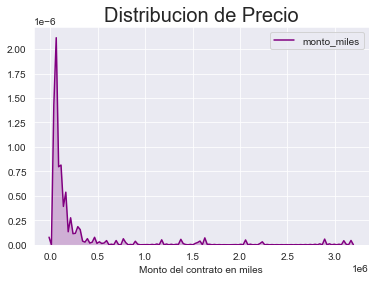

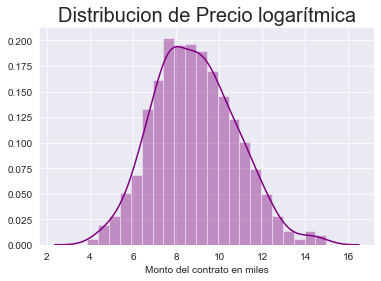

In [23]:
sns.kdeplot(obras_cleaned.monto_miles, color="purple", shade = True)
plt.xlabel("Monto del contrato en miles")
plt.title('Distribucion de Precio',size = 20)
plt.show()

# Plot Log-Precio
sns.distplot(np.log(1+obras_cleaned['monto_miles']),color='purple')
plt.xlabel("Monto del contrato en miles")
plt.title('Distribucion de Precio logarítmica',size = 20)
plt.show()


### Comunas

In [24]:
# Analizamos la cantidad de valores únicos en la feature de comuna

comuna = len(obras_cleaned['comuna'].unique()) 
print(f'En total hay {comuna} comunas en el análisis.\r\n')
print("\n", obras_cleaned['comuna'].unique())

En total hay 16 comunas en el análisis.


 [12.  1.  8.  2.  9.  4. 13. 14. 11.  5. 15.  3.  7. 10.  6. nan]


In [25]:
# Hacemos un análisis similar al monto del contrato, para evaluar la acción a tomar con los Nans

comuna_obra = (obras_cleaned[['etapa','tipo','comuna']].groupby(['etapa']).
              count()).sort_values(by='tipo',ascending=False)
comuna_obra

,tipo,comuna
etapa,,
Finalizada,992,990
En ejecución,53,49
En licitación,2,2


In [26]:
# Sumamos y guardamos en la variable nul la cantidad de Nans en comuna
nul = obras_cleaned['comuna'].isnull().sum()
nul

6

In [27]:
# Analizamos la distribución en % de Nans

comuna_obra['Cantidad_Nans'] = (comuna_obra.tipo-comuna_obra.comuna)
comuna_obra['Distribución de Nans'] = ((comuna_obra.tipo-comuna_obra.comuna)/nul)*100
comuna_obra['Porcentaje de Nans'] = (comuna_obra.Cantidad_Nans/comuna_obra.tipo)*100
comuna_obra

,tipo,comuna,Cantidad_Nans,Distribución de Nans,Porcentaje de Nans
etapa,,,,,
Finalizada,992,990,2,33.333333,0.201613
En ejecución,53,49,4,66.666667,7.547170
En licitación,2,2,0,0.000000,0.000000


Observación: El número de comuna al que pertenece la obra no es un valor que pueda aproximarse o estimarse en función de la descripción estadística de la feature. 

Una alternativa sería armar un modelo de clustering para poder clasificarlo, pero aún así esto estaría sujeto a cierto error que al incluirlo en este punto aumentaría el error en la predicción principal objetivo del trabajo, por ello se decide eliminar los Nans.

In [28]:
# Visualizamos dónde se encuentran los nans

comuna = (obras_cleaned[['etapa','tipo','comuna']].groupby(['tipo']).
              count()).sort_values(by='comuna',ascending=False)
comuna

,etapa,comuna
tipo,,
Espacio Público,356,355
Escuelas,207,207
Arquitectura,194,190
Salud,105,105
Hidráulica e Infraestructura,86,86
Vivienda,66,66
Transporte,33,32


In [29]:
# Procedemos a eliminar los Nans

obras_cleaned.dropna(subset=['comuna'], how='any', inplace=True, axis='index')
filas3 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas3}')

Filas: 1041


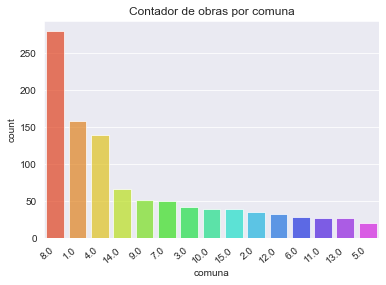

In [30]:
ax = sns.countplot(x='comuna', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.7,
                   order=obras_cleaned['comuna'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por comuna")
plt.show()


In [31]:
comuna = (obras_cleaned[['tipo','comuna']].groupby(['comuna']).
              count()).sort_values(by='tipo',ascending=False)
total = comuna.tipo.sum()
comuna['Porcentaje'] = (comuna.tipo/total)*100
comuna


,tipo,Porcentaje
comuna,,
8.0,280,26.897214
1.0,158,15.177714
4.0,140,13.448607
14.0,67,6.436119
9.0,52,4.995197
7.0,51,4.899135
3.0,42,4.034582
10.0,40,3.842459
15.0,39,3.746398


([<matplotlib.patches.Wedge at 0x1b6b2f9f040>,
 [Text(-0.7479717473324291, 0.6637305667154955, '8.0'),
  Text(-0.8275721310590461, -0.5613593928085544, '1.0'),
  Text(-0.07537485187208681, -0.9971552696071264, '4.0'),
  Text(0.5220483029706865, -0.8529159216273468, '14.0'),
  Text(0.7885060382133067, -0.6150270137978944, '9.0'),
  Text(0.9388295522224229, -0.3443821596335166, '7.0'),
  Text(0.9974862598441755, -0.07086015398006114, '3.0'),
  Text(0.9844563727137461, 0.17562929773615152, '10.0'),
  Text(0.9151340838469509, 0.4031496106678038, '15.0'),
  Text(0.8031231661688242, 0.5958130411152169, '2.0'),
  Text(0.6648583644673334, 0.7469694472987651, '12.0'),
  Text(0.5143048108100651, 0.8576074635738796, '6.0'),
  Text(0.35991687470892986, 0.9329843746278693, '11.0'),
  Text(0.2008215456392463, 0.9796278409717969, '13.0'),
  Text(0.0603204050178192, 0.9981790664697824, '5.0')],
 [Text(-0.5235802231327004, 0.4646113967008468, '26.9%'),
  Text(-0.5793004917413322, -0.39295157496598804, 

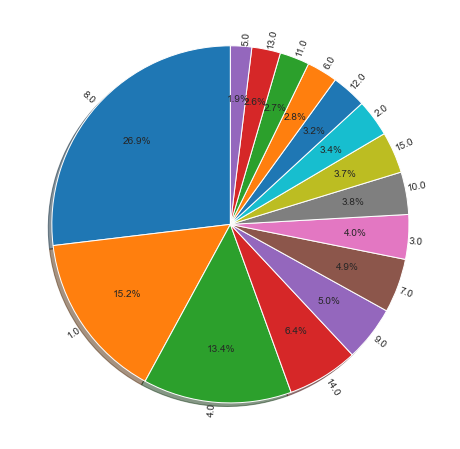

In [32]:
# Otra forma para visualizar

grafico_comuna = comuna.iloc[:,:]
graf = grafico_comuna.index
dat = grafico_comuna.Porcentaje
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.pie(dat, labels = graf,autopct = '%1.1f%%', 
        startangle = 90,labeldistance = 1,
        pctdistance = 0.7,rotatelabels = True,
        radius = 1,shadow = True)

### Plazo en meses

In [33]:
# Analizamos la cantidad de valores únicos en la feature de plazos de realización

meses = len(obras_cleaned['plazo_meses'].unique()) 
print("\n", obras_cleaned['plazo_meses'].unique())


 [29. 16. 22. 28. 12. 18. 20. 23. 21. 30.  3. 15. 10. 11. 14. 17. 31. 27.
 26. 32. 57.  5. 52.  7. 33.  4. 46. 42. 34. 13.  9.  6.  2. nan 24. 25.
  1.  8.  0. 19. 37. 40. 38. 35. 45. 55. 36. 86.]


In [34]:
# Sumamos y guardamos en la variable sin_plazo la cantidad de samples sin este dato
sin_plazo = obras_cleaned['plazo_meses'].isnull().sum()
sin_plazo

63

In [35]:
# Hacemos un análisis similar al monto del contrato, para evaluar la acción a tomar con los Nans

meses_obra = (obras_cleaned[['etapa','tipo','plazo_meses']].groupby(['etapa']).
              count()).sort_values(by='tipo',ascending=False)
meses_obra

,tipo,plazo_meses
etapa,,
Finalizada,990,927
En ejecución,49,49
En licitación,2,2


En este caso, no es necesario analizar la distribución de Nans ya que los 63 se encuentran en las obras finalizadas.

Verificamos rapidamente el % del total que representa

In [36]:
porcentaje_sin_plazo = (63/990)*100

print ('Los Nans representan el: {:.2f} % de los datos totales' .format(porcentaje_sin_plazo))

Los Nans representan el: 6.36 % de los datos totales


Observación: En este caso nos sucede el mismo problema que con la feature de comunas, la idea es estimar este valor, por lo cual armar un modelo para aproximarlo ahora estaría sujeto a error que afectará la predicción principal.

Esto nos lleva nuevamente a eliminar los Nans 

In [37]:
obras_cleaned.dropna(subset=['plazo_meses'], how='any', inplace=True, axis='index')
filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

Filas: 978


In [38]:
# Visualizamos la tabla anterior y vemos que las samples eliminadas efectivamente fueron en las obras finalizadas

año_obra_cleaned = (obras_cleaned[['etapa','tipo','plazo_meses']].groupby(['etapa']).
              count()).sort_values(by='tipo',ascending=False)
año_obra_cleaned

,tipo,plazo_meses
etapa,,
Finalizada,927,927
En ejecución,49,49
En licitación,2,2


In [39]:
# Otra cosa llamativa de esta feature es que hay plazos de "0 meses", vamos a hacer un EDA

obras_cleaned['plazo_0'] = obras_cleaned.plazo_meses == 0

In [40]:
plazo_cero = (obras_cleaned[['etapa','tipo','plazo_0']].groupby(['etapa']).
           sum())

plazo_cero

,plazo_0
etapa,
En ejecución,0.0
En licitación,0.0
Finalizada,44.0


Observación: al igual que nos sucedía antes, buscamos estimar el plazo de construcción, con lo cual tener un plazo de 0 no nos resulta representativo. Puede representar una falla en la carga de datos, para el modelo de machine learning se proceden a eliminar.

Por el momento vamos a considerar que el plazo de 1 mes no es ruido, pero sería un punto a tener en cuenta en este sentido.

In [41]:
obras_cleaned['plazo_0'].replace(True,np.nan,inplace=True)

In [42]:
obras_cleaned.dropna(subset=['plazo_0'], how='any', inplace=True, axis='index')
filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

Filas: 934


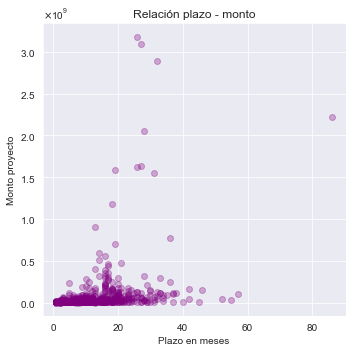

In [43]:
# Visualizamos si existe relación entre el plazo en meses y el monto del contrato

fig=plt.figure(figsize=(5,5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.scatter(obras_cleaned['plazo_meses'], obras_cleaned['monto_contrato'], alpha=0.3, c='purple')  
plt.xlabel('Plazo en meses')
plt.ylabel('Monto proyecto')
plt.title('Relación plazo - monto')
plt.tight_layout()
plt.show()

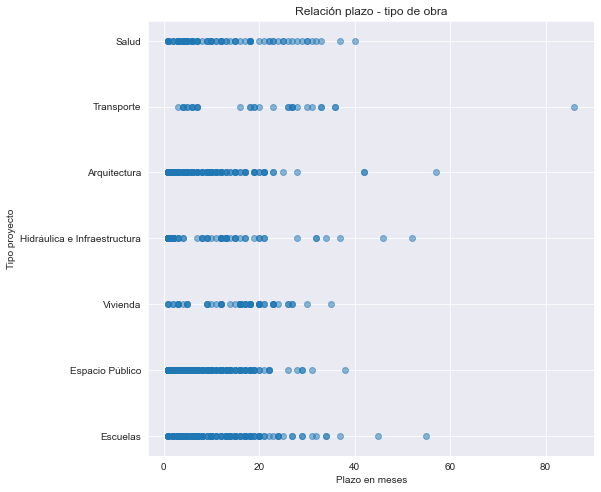

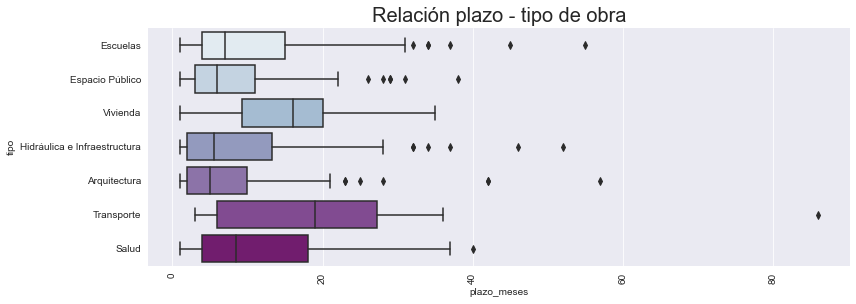

In [44]:
# Visualizamos si existe relación entre el plazo en meses y tipo de obra

fig=plt.figure(figsize=(8,8))
plt.scatter(obras_cleaned['plazo_meses'], obras_cleaned['tipo'], alpha=0.5)  
plt.xlabel('Plazo en meses')
plt.ylabel('Tipo proyecto')
plt.title('Relación plazo - tipo de obra')
plt.show()

g = sns.catplot(x='plazo_meses',y='tipo',data=obras_cleaned, kind="box", height = 4,aspect=3 ,palette = "BuPu")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.title('Relación plazo - tipo de obra',size = 20)
plt.show()

## Aclaración:

El objetivo del TP, como hemos indicado anteriormente, se basa en estimar o predecir el tiempo de realización de la obra pública. Por las características del dataset y como ya vimos a lo largo del desarrollo sabemos que se trata de un dataset desbalanceado, en donde se tiene pocas samples de las obras cuyos plazos de realización son superiores al año. Es por ello que a continuación analizaremos lo que representará nuestro target en modelos de machine learning de 3 maneras distintas, para luego definir cuál es la que nos otorga mayor precisión y elaborar conclusiones al respecto.



## Plazo: Meses

En primer lugar analizaremos la posibilidad de predecir el período de realización en meses (como se encuentra cargada la información en el dataset)

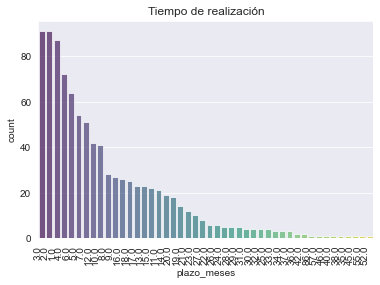

In [45]:
ax = sns.countplot(x='plazo_meses', 
                   data=obras_cleaned,
                   palette='viridis',
                   alpha=0.7,
                   order=obras_cleaned['plazo_meses'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Tiempo de realización")
plt.show()

In [46]:
# Visualizamos el gráfico anterior con %

mes_obra_cleaned = (obras_cleaned[['etapa','plazo_meses']].groupby(['plazo_meses']).count().
                      sort_values(by='etapa',ascending=False))
suma = mes_obra_cleaned.etapa.sum()                      
mes_obra_cleaned['Porcentaje'] = (mes_obra_cleaned.etapa/suma)*100
mes_obra_cleaned

,etapa,Porcentaje
plazo_meses,,
3.0,91,9.743041
2.0,91,9.743041
1.0,87,9.314775
4.0,72,7.708779
6.0,64,6.852248
5.0,54,5.781585
7.0,51,5.460385
12.0,42,4.496788
10.0,41,4.389722


([<matplotlib.patches.Wedge at 0x1b6b31a44f0>,
 [Text(-0.3013295439650227, 0.9535200605828026, '3.0'),
  Text(-0.7945463513382146, 0.6072035042513593, '2.0'),
  Text(-0.9985522053287119, 0.053791200332080215, '1.0'),
  Text(-0.8865356360045764, -0.4626603139388133, '4.0'),
  Text(-0.591045574315185, -0.8066381649056987, '6.0'),
  Text(-0.2332813841253192, -0.9724092738248516, '5.0'),
  Text(0.11745439578392197, -0.9930782773331787, '7.0'),
  Text(0.4173615914436674, -0.9087405031072453, '12.0'),
  Text(0.6516198645841773, -0.758545682262643, '10.0'),
  Text(0.808621749009772, -0.5883288765889171, '8.0'),
  Text(0.9030435966936756, -0.4295489057960106, '9.0'),
  Text(0.9649029111995907, -0.2626068772110792, '16.0'),
  Text(0.9955683582274714, -0.09404065129643296, '18.0'),
  Text(0.9977380579281462, 0.06722178041208904, '13.0'),
  Text(0.9754595549729093, 0.2201786924569535, '17.0'),
  Text(0.9311073450053223, 0.36474527012305413, '15.0'),
  Text(0.8688143797470589, 0.49513793385756, '1

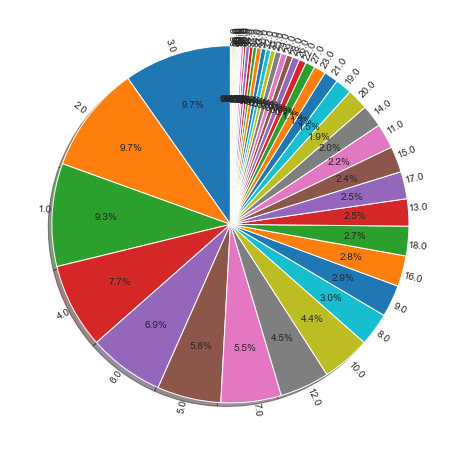

In [47]:
# Visualizamos 
grafico_mes = mes_obra_cleaned.iloc[:,:]
graf = grafico_mes.index
dat = grafico_mes.Porcentaje
plt.figure(figsize = (8,8))
plt.axis('equal')
plt.pie(dat, labels = graf,autopct = '%1.1f%%', 
        startangle = 90,labeldistance = 1,
        pctdistance = 0.7,rotatelabels = True,
        radius = 1,shadow = True)

## Plazo: Años

La segunda alternativa es agrupar las obras en plazos anuales

In [48]:
# Vamos a agrupar en períodos
# Para no reemplazar los datos exactos de los plazos, vamos a crear una nueva columna "Plazo en años".

obras_cleaned['plazo_años'] = obras_cleaned['plazo_meses']

# En esta nueva columna, reemplazamos los valores agrupando por períodos.

def clean_row(row):
    a= [0,1,2,3,4,5,6,7,8,9,10,11,12]
    b= [13,14,15,16,17,18,19,20,21,22,23,24]
    c= [25,26,27,28,29,30,31,32,33,34,35,36]
    d= [37,38,39,40,41,42,43,44,45,46,47,48,57,52,55,86]
    #e= [57,52,55,86]
    
    if row.plazo_años in a:
        return 'Menos de 1 año'
    if row.plazo_años in b:
        return 'De 1 a 2 años'
    if row.plazo_años in c:
        return 'De 2 a 3 años'
    if row.plazo_años in d:
        return 'Más de 3 años'
    #if row.plazo_meses in e:
        #return 'Más de 4 años'
    
    
    return row.plazo_años

def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['plazo_años']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)

print(f'Los plazos de las obras ahora quedarán agrupados como:"\r\n')
print(obras_cleaned.plazo_años.unique())

Los plazos de las obras ahora quedarán agrupados como:"

['De 2 a 3 años' 'De 1 a 2 años' 'Menos de 1 año' 'Más de 3 años']


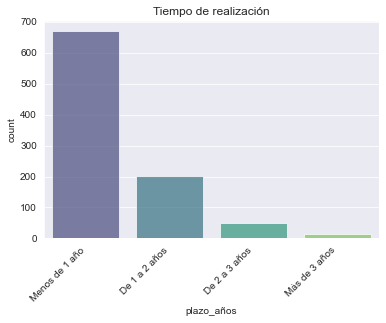

In [49]:
ax = sns.countplot(x='plazo_años', 
                   data=obras_cleaned,
                   palette='viridis',
                   alpha=0.7,
                   order=obras_cleaned['plazo_años'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Tiempo de realización")
plt.show()

In [50]:
# Verificamos nuevamente el estado de los tipos de obras, tal como se mencionó al comienzo del EDA

tipo_obra2 = (obras_cleaned[['etapa','tipo']].groupby(['tipo']).count()).sort_values(by='etapa',ascending=False)
total_tipo2 = tipo_obra2.sum()
porcentaje_tipo2 = (tipo_obra2 / total_tipo2)*100
tipo_obra2['Porcentaje_final'] = porcentaje_tipo2
df=pd.merge(tipo_obra,tipo_obra2, on='tipo').drop(columns=['etapa_x','etapa_y'])
df

,Porcentaje,Porcentaje_final
tipo,,
Espacio Público,32.587287,31.263383
Escuelas,21.933751,21.092077
Arquitectura,17.994628,19.593148
Salud,9.668756,9.850107
Hidráulica e Infraestructura,8.504924,8.137045
Vivienda,6.087735,6.638116
Transporte,3.222919,3.426124


Observación: No hubo una variación tan importante en la distribución, procedemos a continuar con el EDA, en caso de que el modelo de aprendizaje no obtenga buenos resultados este es un punto a tener en cuenta

## Plazo: Trimestres

La tercer alternativa es agrupar el primer año en trimestres, que es donde se concentran la mayor cantidad de samples, y generalizar los restantes en períodos anuales

In [51]:
# Vamos a agrupar en períodos
# Para no reemplazar los datos exactos de los plazos, vamos a crear una nueva columna "plazo_trimestres".

obras_cleaned['plazo_trimestres'] = obras_cleaned['plazo_meses']

# En esta nueva columna, reemplazamos los valores agrupando por períodos.

def clean_row(row):
    a= [0,1,2,3]
    b= [4,5,6]
    c= [7,8,9]
    d= [10,11,12]
    e= [13,14,15,16,17,18,19,20,21,22,23,24]
    f= [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,57,52,55,86]
    #La última banda se hace más larga por la poca cantidad de samples
    
    if row.plazo_trimestres in a:
        return 'Hasta 3 meses'
    if row.plazo_trimestres in b:
        return 'Entre 3 y 6 meses'
    if row.plazo_trimestres in c:
        return 'Entre 7 y 9 meses'
    if row.plazo_trimestres in d:
        return 'Entre 9 meses y 1 año'
    if row.plazo_trimestres in e:
        return 'Entre 1 y 2 años'
    if row.plazo_trimestres in f:
        return 'Más de 2 años'
    
    
    return row.plazo_trimestres

def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['plazo_trimestres']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)

print(f'Los plazos de las obras ahora quedarán agrupados como:"\r\n')
print(obras_cleaned.plazo_trimestres.unique())

Los plazos de las obras ahora quedarán agrupados como:"

['Más de 2 años' 'Entre 1 y 2 años' 'Entre 9 meses y 1 año'
 'Hasta 3 meses' 'Entre 3 y 6 meses' 'Entre 7 y 9 meses']


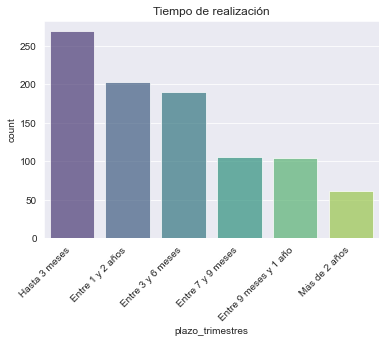

In [52]:
ax = sns.countplot(x='plazo_trimestres', 
                   data=obras_cleaned,
                   palette='viridis',
                   alpha=0.7,
                   order=obras_cleaned['plazo_trimestres'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Tiempo de realización")
plt.show()

### Guardar data set limpio luego del EDA

Generaremos las 3 versiones para aplicar los modelos de machine learning (meses, años y trimestres)

In [53]:
# Generamos un nuevo data set con las columnas de interés y lo guardamos en un nuevo Excel

df_años = obras_cleaned[['etapa','tipo','plazo_años','monto_miles','comuna']]
df_años

,etapa,tipo,plazo_años,monto_miles,comuna
0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12.0
1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12.0
2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1.0
3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1.0
4,Finalizada,Vivienda,Menos de 1 año,6990.315,8.0
...,...,...,...,...,...
1111,Finalizada,Espacio Público,Menos de 1 año,2325.368,8.0
1112,Finalizada,Espacio Público,Menos de 1 año,1984.627,8.0
1114,Finalizada,Espacio Público,Menos de 1 año,6557.067,9.0
1115,Finalizada,Espacio Público,Menos de 1 año,22279.428,15.0


In [54]:
df_años.to_excel('obras_publicas.xlsx')  #Años

In [55]:
# Generamos un nuevo data set con las columnas de interés y lo guardamos en un nuevo Excel

df_meses = obras_cleaned[['etapa','tipo','plazo_meses','monto_miles','comuna']]
df_meses

,etapa,tipo,plazo_meses,monto_miles,comuna
0,Finalizada,Escuelas,29.0,67065.700,12.0
1,Finalizada,Espacio Público,16.0,9950.017,12.0
2,Finalizada,Espacio Público,22.0,36942.632,1.0
3,Finalizada,Espacio Público,28.0,26938.294,1.0
4,Finalizada,Vivienda,12.0,6990.315,8.0
...,...,...,...,...,...
1111,Finalizada,Espacio Público,2.0,2325.368,8.0
1112,Finalizada,Espacio Público,1.0,1984.627,8.0
1114,Finalizada,Espacio Público,1.0,6557.067,9.0
1115,Finalizada,Espacio Público,1.0,22279.428,15.0


In [56]:
df_meses.to_excel('obras_en_meses.xlsx')  #Meses

In [57]:
# Generamos un nuevo data set con las columnas de interés y lo guardamos en un nuevo Excel

df_trim = obras_cleaned[['etapa','tipo','plazo_trimestres','monto_miles','comuna']]
df_trim

,etapa,tipo,plazo_trimestres,monto_miles,comuna
0,Finalizada,Escuelas,Más de 2 años,67065.700,12.0
1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12.0
2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1.0
3,Finalizada,Espacio Público,Más de 2 años,26938.294,1.0
4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8.0
...,...,...,...,...,...
1111,Finalizada,Espacio Público,Hasta 3 meses,2325.368,8.0
1112,Finalizada,Espacio Público,Hasta 3 meses,1984.627,8.0
1114,Finalizada,Espacio Público,Hasta 3 meses,6557.067,9.0
1115,Finalizada,Espacio Público,Hasta 3 meses,22279.428,15.0


In [58]:
df_trim.to_excel('obras_en_trimestres.xlsx')  #Trimestres